# import prerequisite

In [2]:
import qiskit
import matplotlib as plt
from qiskit_aer import Aer,AerSimulator
from qiskit.visualization import plot_bloch_multivector , plot_histogram
import numpy as np 
from math import pi
from qiskit_textbook.tools import array_to_latex


In [3]:
print(qiskit.__version__)

2.0.0


# pauli and h gates

In [4]:
qc = qiskit.QuantumCircuit(2)  # Create a quantum circuit with 2 qubits

initial_state = [0, 1, 0, 0]  # Define the initial state as a vector |1⟩ for the first qubit (index 1)

norm = np.linalg.norm(initial_state)  # Calculate the norm of the initial state vector to ensure it's normalized

initial_state = initial_state / norm  # Normalize the initial state vector

qc.initialize(initial_state, [0, 1])  # Initialize the quantum circuit with the specified initial state on both qubits


In [5]:
qc.x(0)  # Apply an X (NOT) gate to the first qubit

qc.y(0)  # Apply a Y gate to the first qubit (a rotation around the Y axis)

qc.z(1)  # Apply a Z gate to the second qubit (a phase flip on the second qubit)

qc.h(1)  # Apply a Hadamard gate to the second qubit (creates superposition)

qc.draw()  # Draw the quantum circuit (without specifying 'mpl', it will use the default drawing)


┌──────────────────────┐┌───┐┌───┐
q_0: ┤0                     ├┤ X ├┤ Y ├
     │  Initialize(0,1,0,0) │├───┤├───┤
q_1: ┤1                     ├┤ Z ├┤ H ├
     └──────────────────────┘└───┘└───┘

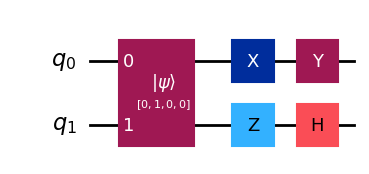

In [6]:

qc.draw('mpl')

In [7]:
backend = Aer.get_backend("statevector_simulator")  # Select the statevector simulator backend for running the quantum circuit

job = backend.run(qc)  # Execute the quantum circuit on the selected backend

result = job.result()  # Retrieve the result of the execution

counts = result.get_counts()  # Get the measurement results (counts of output states)

statevector = result.get_statevector()  # Retrieve the statevector representing the quantum state

print(counts)  # Print the measurement results

print(statevector)  # Print the statevector representing the quantum state

array_to_latex(statevector, pretext='\\text{statevector} = ')  # Convert the statevector to LaTeX format for display


{np.str_('01'): np.float64(0.5), np.str_('11'): np.float64(0.5)}
Statevector([0.+0.j        , 0.+0.70710678j, 0.+0.j        ,
             0.+0.70710678j],
            dims=(2, 2))


<IPython.core.display.Math object>

In [8]:
simulator = AerSimulator()  # Create an instance of the AerSimulator for simulation

compiled_circuit = qiskit.transpile(qc, simulator)  # Transpile the quantum circuit to be optimized for the simulator

compiled_circuit.measure_all()  # Add measurement operations to all qubits in the circuit

sim_result = simulator.run(compiled_circuit, shots=1000).result()  # Run the compiled circuit with 1000 shots and get the result

counts = sim_result.get_counts()  # Get the measurement results (counts of output states)

print(counts)  # Print the measurement results


{'11': 509, '01': 491}


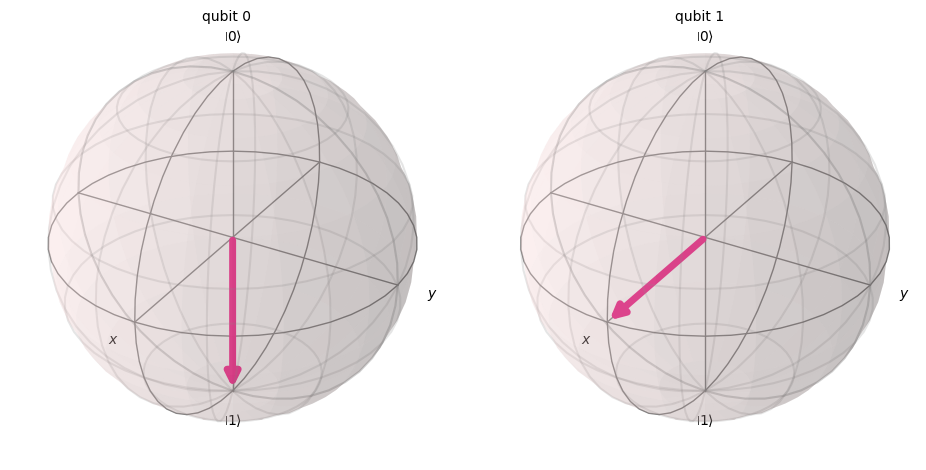

In [9]:
plot_bloch_multivector(statevector)

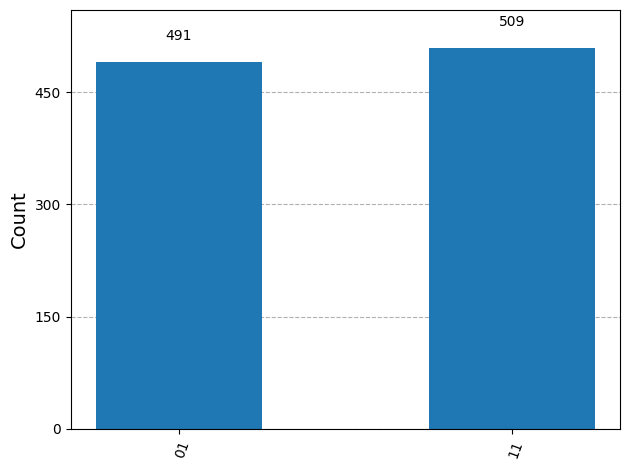

In [10]:
plot_histogram(counts)

# RΦ gates

In [11]:
qc = qiskit.QuantumCircuit(2)  # Create a quantum circuit with 2 qubits

initial_state = [1, 1, 0, 0]  # Define the initial state vector, which represents a superposition of |00⟩ and |01⟩

norm = np.linalg.norm(initial_state)  # Calculate the norm (magnitude) of the initial state vector to ensure it's normalized

initial_state = initial_state / norm  # Normalize the initial state vector to make sure it has unit length

qc.initialize(initial_state, [0, 1])  # Initialize the quantum circuit with the specified initial state on both qubits


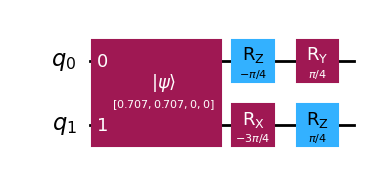

In [12]:
qc.rz(-pi/4, 0)  # Apply a Z rotation gate to the first qubit (0th qubit) with an angle of -π/4

qc.ry(pi/4, 0)   # Apply a Y rotation gate to the first qubit (0th qubit) with an angle of π/4

qc.rx(-3*pi/4, 1)  # Apply an X rotation gate to the second qubit (1st qubit) with an angle of -3π/4

qc.rz(pi/4, 1)    # Apply a Z rotation gate to the second qubit (1st qubit) with an angle of π/4

qc.draw('mpl')    # Draw the quantum circuit using Matplotlib for visualization


In [13]:
backend = Aer.get_backend("statevector_simulator")  # Select the statevector simulator backend for running the quantum circuit

job = backend.run(qc)  # Execute the quantum circuit on the selected backend

result = job.result()  # Retrieve the result of the execution

counts = result.get_counts()  # Get the measurement results (counts of output states)

statevector = result.get_statevector()  # Retrieve the statevector representing the quantum state

print(counts)  # Print the measurement results

print(statevector)  # Print the statevector representing the quantum state

array_to_latex(statevector, pretext='\\text{statevector} = ')  # Convert the statevector to LaTeX format for display


{np.str_('00'): np.float64(0.036611652351682), np.str_('01'): np.float64(0.109834957055045), np.str_('10'): np.float64(0.213388347648318), np.str_('11'): np.float64(0.640165042944955)}
Statevector([ 0.1767767 +0.0732233j ,  0.28033009-0.1767767j ,
             -0.4267767 +0.1767767j , -0.1767767 +0.78033009j],
            dims=(2, 2))


<IPython.core.display.Math object>

In [14]:
# Use the AerSimulator for running the quantum circuit
simulator = AerSimulator()  

# Transpile (optimize) the quantum circuit for the selected simulator
compiled_circuit = qiskit.transpile(qc, simulator)  

# Add measurements for all qubits in the circuit
compiled_circuit.measure_all()  

# Execute the transpiled circuit with 1000 shots (repetitions) and get the result
sim_result = simulator.run(compiled_circuit, shots=1000).result()  

# Get the measurement results (counts of output states)
counts = sim_result.get_counts()  

# Print the measurement results
print(counts)


{'11': 636, '10': 221, '00': 50, '01': 93}


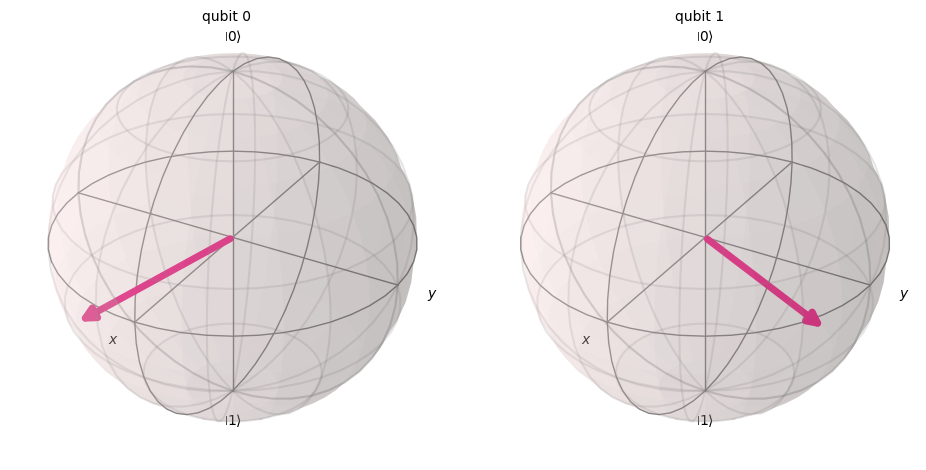

In [15]:
plot_bloch_multivector(statevector)

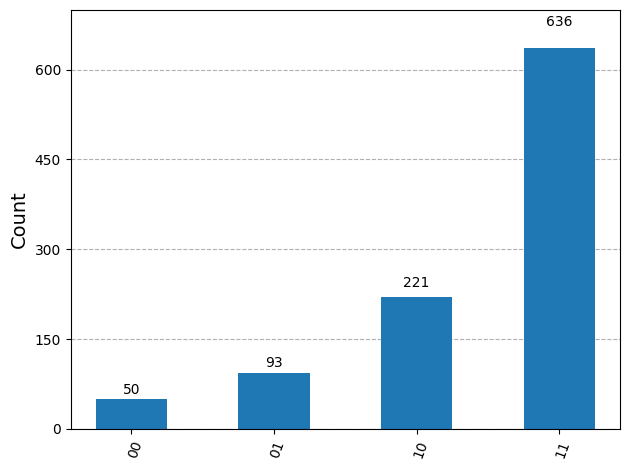

In [16]:
plot_histogram(counts)

# S and T gates

In [17]:
qc = qiskit.QuantumCircuit(2)  # Create a quantum circuit with 2 qubits

initial_state = [1, 1, 0, 0]  # Define the initial state vector, which represents a superposition of |00⟩ and |01⟩

norm = np.linalg.norm(initial_state)  # Calculate the norm (magnitude) of the initial state vector to ensure it’s normalized

initial_state = initial_state / norm  # Normalize the initial state vector to make sure it has unit length

qc.initialize(initial_state, [0, 1])  # Initialize the quantum circuit with the specified initial state on both qubits


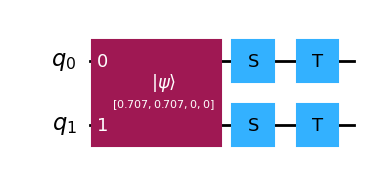

In [18]:
qc.s(0)  # Apply the S gate (phase shift by π/2) to the first qubit (qubit 0).
# The S gate corresponds to a phase rotation of π/2, which transforms the state |ψ⟩ → exp(iπ/2)|ψ⟩.
# It only changes the phase of the state, so it doesn't affect the probability amplitudes, but modifies the relative phase between components.
# In matrix form, S is: [[1, 0], [0, i]], where "i" is the imaginary unit.

qc.s(1)  # Apply the S gate (phase shift by π/2) to the second qubit (qubit 1).
# Similarly, the S gate on qubit 1 applies a phase of π/2 to the amplitude of the second qubit.
# The result is a relative phase shift in the state of qubit 1, but no change in its amplitude.

qc.t(0)  # Apply the T gate (phase shift by π/4) to the first qubit (qubit 0).
# The T gate corresponds to a phase rotation of π/4, which transforms the state |ψ⟩ → exp(iπ/4)|ψ⟩.
# It also affects only the phase of the qubit, and thus doesn't change the measurement probabilities, but alters the relative phases between the states.
# In matrix form, T is: [[1, 0], [0, exp(iπ/4)]], where exp(iπ/4) is a phase factor applied to the |1⟩ state.

qc.t(1)  # Apply the T gate (phase shift by π/4) to the second qubit (qubit 1).
# Similar to the T gate on qubit 0, this applies a phase of π/4 to the second qubit.
# The T gate here introduces a phase shift between the |0⟩ and |1⟩ states for qubit 1, impacting the superposition's relative phase.

qc.draw('mpl')  # Draw the quantum circuit using Matplotlib for visualization.
# The 'mpl' option generates a graphical visualization of the circuit using Matplotlib.
# This visualization helps in understanding the sequence of operations applied to the qubits and provides a clear depiction of the circuit's flow.


In [19]:
# Select the statevector simulator backend for running the quantum circuit
backend = Aer.get_backend("statevector_simulator")  
# The "statevector_simulator" allows us to simulate the evolution of the quantum state vector
# It doesn't give measurement results directly, but it provides the full quantum state after execution.

# Execute the quantum circuit (qc) on the selected backend
job = backend.run(qc)  
# Running the job simulates the quantum circuit on the chosen backend. 
# The result is a job object that contains the quantum state or measurements after execution.

# Retrieve the result of the execution
result = job.result()  
# The result object contains the output of the job, including the statevector and any measurement outcomes.

# Get the measurement results (counts of output states) from the result object
counts = result.get_counts()  
# The "counts" is a dictionary that shows the frequency of each measured state across all shots of the circuit.
# For example, {‘00’: 500, ‘11’: 500} means 500 measurements resulted in the state |00⟩ and 500 in |11⟩.

# Get the statevector representing the quantum state after execution
statevector = result.get_statevector()  
# The statevector is a complex vector that describes the state of all qubits in the system.
# It provides the amplitudes of the computational basis states, including their phase information.

# Print the measurement results (counts)
print(counts)  
# This prints the counts dictionary, showing the measured states and their frequencies.
# This output will be relevant if we have a measurement step in the circuit.

# Print the statevector representing the quantum state
print(statevector)  
# This prints the full statevector of the quantum system, which contains the amplitude information for all possible states.

# Convert the statevector to LaTeX format and print it for more readable display
array_to_latex(statevector, pretext='\\text{statevector} = ')  
# This function converts the statevector to a LaTeX-friendly format so it can be displayed as a mathematical expression.
# The 'pretext' is optional and is used to specify the label that will appear before the vector.


{np.str_('00'): np.float64(0.5), np.str_('01'): np.float64(0.5)}
Statevector([ 0.70710678+0.j , -0.5       +0.5j,  0.        +0.j ,
              0.        +0.j ],
            dims=(2, 2))


<IPython.core.display.Math object>

In [20]:
# Create an instance of the AerSimulator to run the quantum circuit on the simulator backend.
simulator = AerSimulator()  
# The AerSimulator is part of Qiskit Aer, which is designed for simulating quantum circuits using classical resources.
# It simulates the behavior of a quantum computer, and we can run the circuit without the need for actual hardware.

# Transpile (optimize) the quantum circuit for the simulator
compiled_circuit = qiskit.transpile(qc, simulator)  
# The `transpile` function optimizes the quantum circuit for the chosen backend (in this case, the AerSimulator).
# It makes sure that the circuit uses the appropriate gate set and structure for efficient simulation.

# Add measurements to all qubits in the quantum circuit
compiled_circuit.measure_all()  
# This adds measurement operations to all qubits in the circuit.
# When a quantum circuit is measured, the quantum state collapses to one of the computational basis states, and we obtain classical results.

# Run the compiled circuit with 1000 shots (repetitions) on the simulator backend
sim_result = simulator.run(compiled_circuit, shots=1000).result()  
# The `shots=1000` parameter means the circuit will be executed 1000 times (repeated experiments) to gather statistics about the measurement outcomes.
# The result is a `JobResult` object that contains all the data from these 1000 repetitions.

# Get the measurement results (counts of output states)
counts = sim_result.get_counts()  
# The `counts` variable contains a dictionary where the keys are the measured states (like '00', '01', etc.), 
# and the values represent how many times each state occurred in the 1000 shots.

# Print the measurement results (counts of output states)
print(counts)  
# This prints out the dictionary of measurement results, showing how many times each computational basis state was observed.


{'01': 501, '00': 499}


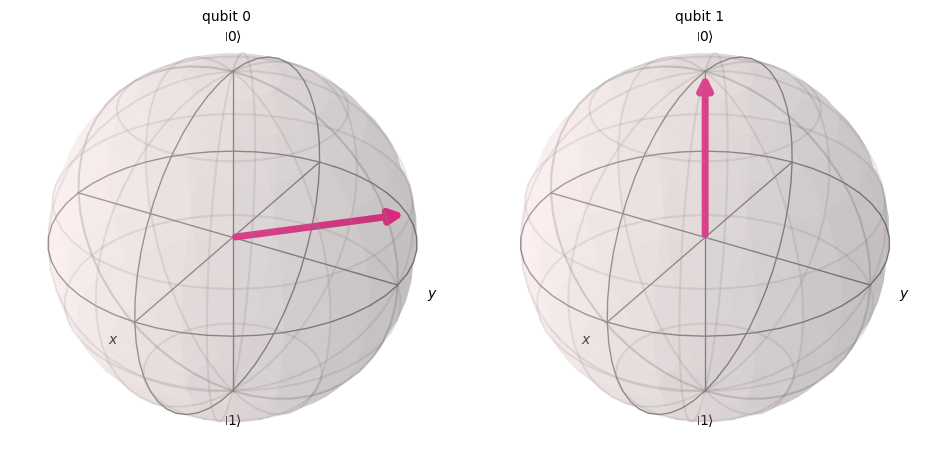

In [21]:
# Visualize the statevector on the Bloch sphere
plot_bloch_multivector(statevector)  
# The `plot_bloch_multivector` function visualizes a quantum state (represented as a statevector) on the Bloch sphere.
# The Bloch sphere is a geometric representation of a qubit’s state. It provides a way to visualize the quantum state using three parameters:
# - The x, y, and z components of the Bloch vector, which represent the state of a qubit.
# In this case, `statevector` is the full quantum state of the system, and the function will map the state of each qubit onto the Bloch sphere.

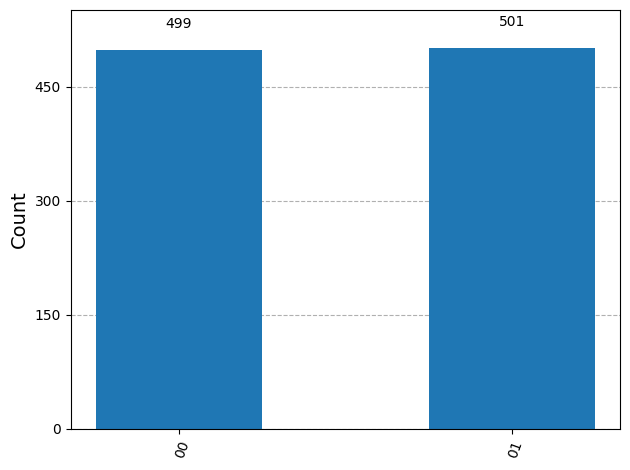

In [22]:
# Visualize the measurement outcomes (counts) as a histogram
plot_histogram(counts)  
# The `plot_histogram` function creates a histogram of the measurement results from the quantum circuit.
# The `counts` variable contains a dictionary where the keys represent the measured states (like '00', '01', etc.),
# and the values represent how many times each state was measured in the circuit’s shots (e.g., how many times '00' appeared).
# The histogram will display the frequencies of each measured state, allowing us to visualize the probabilities of the measured states.


# U gates(euler angles)

In [23]:
# Create a quantum circuit with 3 qubits (and no classical bits)
qc = qiskit.QuantumCircuit(3)  
# This initializes a quantum circuit with 3 qubits, which is capable of holding a quantum state with 8 possible states (2^3 = 8 states).

# Define the initial state vector as [0, 0, 0, 0, 0, 0, 0, 1]
# This state represents the quantum state |111⟩, where qubits 0, 1, and 2 are all in state |1⟩.
# The last element of the state vector corresponds to the |111⟩ state, and the rest are all 0, meaning no other basis states are populated.
initial_state = [0, 0, 0, 0, 0, 0, 0, 1]  

# Calculate the norm (magnitude) of the initial state vector to ensure it is normalized.
# The norm is the square root of the sum of the squares of all components of the vector.
# In this case, sqrt(0^2 + 0^2 + ... + 1^2) = 1, so it is already normalized.
norm = np.linalg.norm(initial_state)  

# Normalize the initial state vector by dividing it by the norm.
# This ensures the quantum state is valid (normalized with total probability = 1).
initial_state = initial_state / norm  

# Initialize the quantum circuit with the specified initial state.
# The quantum circuit is now prepared in the state |111⟩, where all qubits are in the state |1⟩.
qc.initialize(initial_state)  
# This step applies the "initialize" method, which sets the qubits to the provided initial state vector.
# The state |111⟩ is represented by the vector [0, 0, 0, 0, 0, 0, 0, 1] in the computational basis.



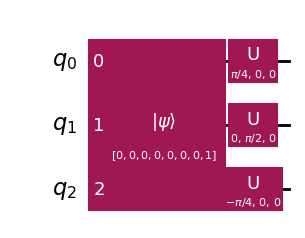

In [24]:
# Apply a U gate to qubit 0 with parameters (π/4, 0, 0)
qc.u(np.pi/4, 0, 0, 0)
# The U gate is a general single-qubit rotation gate defined by the parameters: (theta, phi, lambda).
# For qubit 0, we apply a rotation of π/4 along the Bloch sphere. 
# The parameters (π/4, 0, 0) mean the rotation is performed by an angle of π/4, with no additional phase shifts along the X and Z axes.

# Apply a U gate to qubit 1 with parameters (0, π/2, 0)
qc.u(0, np.pi/2, 0, 1)
# For qubit 1, we apply a rotation of π/2 with no rotation angle along the Z axis (theta = 0) 
# and a phase shift of π/2 around the X axis (phi = π/2). The lambda (third parameter) is set to 0.

# Apply a U gate to qubit 2 with parameters (-π/4, 0, 0)
qc.u(-np.pi/4, 0, 0, 2)
# For qubit 2, we apply a rotation of -π/4 along the Bloch sphere. The parameters (-π/4, 0, 0) indicate 
# a rotation of -π/4 on the Bloch sphere, without any phase shifts (both phi and lambda are 0).

# Visualize the quantum circuit using Matplotlib
qc.draw('mpl')
# The `draw('mpl')` command generates a graphical representation of the quantum circuit using Matplotlib.
# It visually shows the sequence of quantum gates and how they are applied to each qubit in the circuit.


In [25]:
backend=Aer.get_backend("statevector_simulator")
job=backend.run(qc)
result=job.result()
counts=result.get_counts()
statevector=result.get_statevector()
print(counts)
print(statevector)
array_to_latex(statevector,pretext='\\text{statevector} = ')

{np.str_('010'): np.float64(0.021446609406726), np.str_('011'): np.float64(0.125), np.str_('110'): np.float64(0.125), np.str_('111'): np.float64(0.728553390593274)}
Statevector([ 0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
             -8.96726857e-18-0.14644661j,  2.16489014e-17+0.35355339j,
              0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
             -2.16489014e-17-0.35355339j,  5.22650714e-17+0.85355339j],
            dims=(2, 2, 2))


<IPython.core.display.Math object>

In [26]:
simulator = AerSimulator()
compiled_circuit =qiskit.transpile(qc, simulator)
compiled_circuit.measure_all()
sim_result = simulator.run(compiled_circuit,shots=1000).result()
counts = sim_result.get_counts()
print(counts)

{'011': 113, '111': 744, '110': 125, '010': 18}


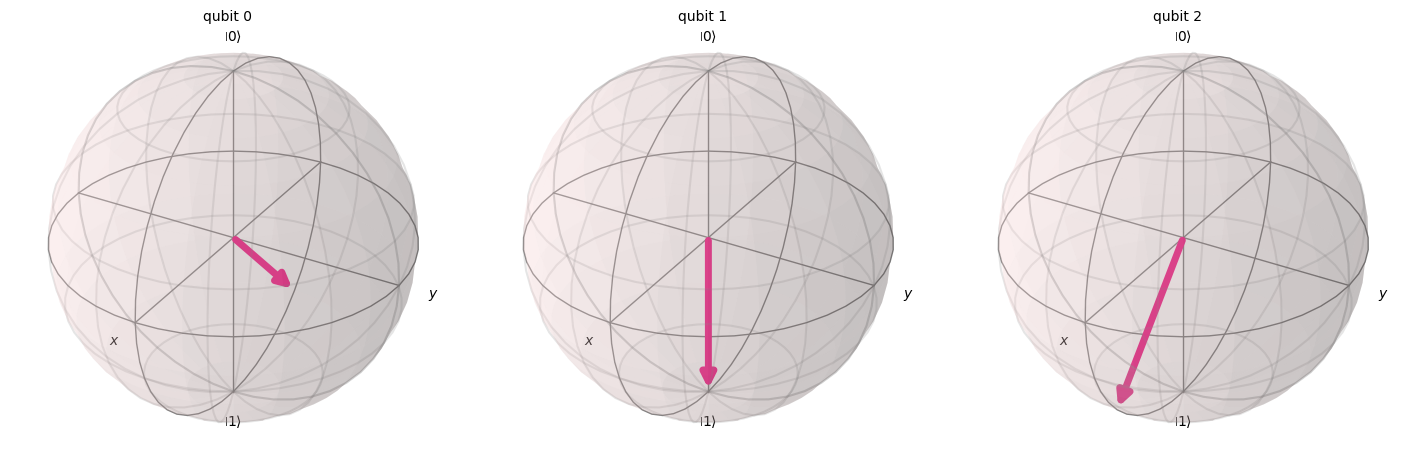

In [27]:
plot_bloch_multivector(statevector)

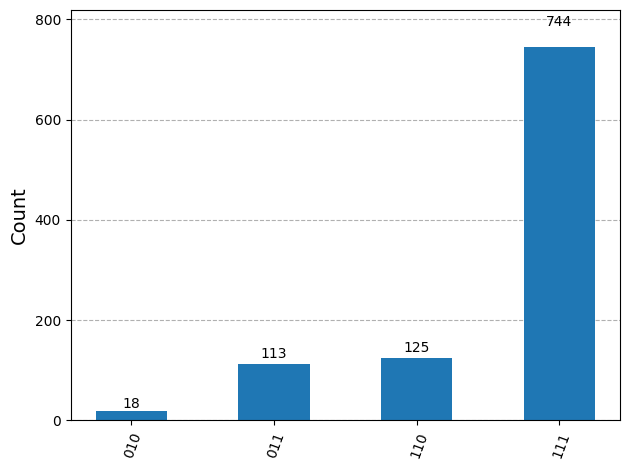

In [28]:
plot_histogram(counts)

# controll gates

In [29]:
# Create a quantum circuit with 3 qubits (no classical bits)
qc = qiskit.QuantumCircuit(3)  
# This creates a quantum circuit with 3 qubits, allowing you to perform operations on 3 qubits in parallel.
# No classical bits are included at this stage, so no measurements have been performed yet.

# Define the initial state vector as [0, 0, 0, 1, 0, 0, 0, 1]
# This vector represents a superposition of the states |100⟩ and |111⟩.
# The amplitudes of the basis states are [0, 0, 0, 1, 0, 0, 0, 1], meaning |100⟩ and |111⟩ are the only non-zero states.
# The coefficients of these two states are 1, so their total probability is 1.
initial_state = [0, 0, 0, 1, 0, 0, 0, 1] 

# Normalize the state vector to ensure its total probability is 1.
# The norm of a vector is the square root of the sum of the squared magnitudes of all its components.
# In this case, the vector has two non-zero components (at positions 3 and 7), both with magnitude 1.
norm = np.linalg.norm(initial_state)  
# The norm is sqrt(1^2 + 1^2) = sqrt(2), so we need to divide each component by sqrt(2) to normalize.

# Normalize the state vector by dividing each component by the norm.
initial_state = initial_state / norm  
# After normalization, the state vector will have a unit norm, ensuring the total probability of measurement is 1.

# Initialize the quantum circuit with the specified initial state.
qc.initialize(initial_state)  
# This operation sets the qubits in the quantum circuit to the provided initial state vector.
# The state vector corresponds to a superposition of |100⟩ and |111⟩ with equal probability (amplitude of 1/sqrt(2)) for each.


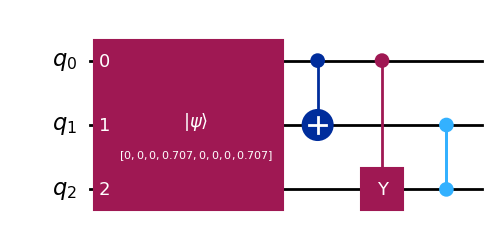

In [30]:
# Apply a CNOT gate (CX) with qubit 0 as the control and qubit 1 as the target
qc.cx(0, 1)
# The CNOT (Controlled-NOT) gate performs an X operation (a NOT gate) on the target qubit (qubit 1) only if the control qubit (qubit 0) is in the state |1⟩.
# If qubit 0 is in state |0⟩, qubit 1 remains unchanged. If qubit 0 is in state |1⟩, qubit 1 is flipped.
# This gate is a fundamental two-qubit operation and is widely used for creating entanglement between qubits.

# Apply a CY gate (Controlled-Y) with qubit 0 as the control and qubit 2 as the target
qc.cy(0, 2)
# The CY gate is a controlled gate that applies a Y operation (a Pauli Y gate) on qubit 2 if qubit 0 is in the state |1⟩.
# The Y gate combines a bit-flip (X gate) and a phase-flip (Z gate), and the controlled Y gate only applies this transformation to qubit 2 when qubit 0 is in state |1⟩.
# If qubit 0 is in state |0⟩, qubit 2 is unaffected.

# Apply a CZ gate (Controlled-Z) with qubit 1 as the control and qubit 2 as the target
qc.cz(1, 2)
# The CZ gate is a controlled operation where the target qubit (qubit 2) is subjected to a Z operation (phase-flip) only if qubit 1 is in the state |1⟩.
# If qubit 1 is in state |0⟩, qubit 2 is unaffected. If qubit 1 is in state |1⟩, qubit 2 undergoes a phase-flip (Z gate), which changes the phase of the state.
# The CZ gate is typically used to create entanglement or to apply conditional phase shifts.

# Visualize the quantum circuit using Matplotlib
qc.draw('mpl')
# The `draw('mpl')` command generates a graphical representation of the quantum circuit using Matplotlib.
# It shows the quantum gates applied to each qubit in the circuit and their sequence of operations.
# This visualization helps you understand the overall structure and flow of the quantum operations in the circuit.


In [31]:
backend=Aer.get_backend("statevector_simulator")
job=backend.run(qc)
result=job.result()
counts=result.get_counts()
statevector=result.get_statevector()
print(counts)
print(statevector)
array_to_latex(statevector,pretext='\\text{statevector} = ')

{np.str_('001'): np.float64(0.5), np.str_('101'): np.float64(0.5)}
Statevector([ 0.+0.j        ,  0.-0.70710678j,  0.+0.j        ,
              0.-0.j        ,  0.+0.j        ,  0.+0.70710678j,
             -0.+0.j        , -0.+0.j        ],
            dims=(2, 2, 2))


<IPython.core.display.Math object>

In [32]:
simulator = AerSimulator()
compiled_circuit =qiskit.transpile(qc, simulator)
compiled_circuit.measure_all()
sim_result = simulator.run(compiled_circuit,shots=1000).result()
counts = sim_result.get_counts()
print(counts)

{'001': 487, '101': 513}


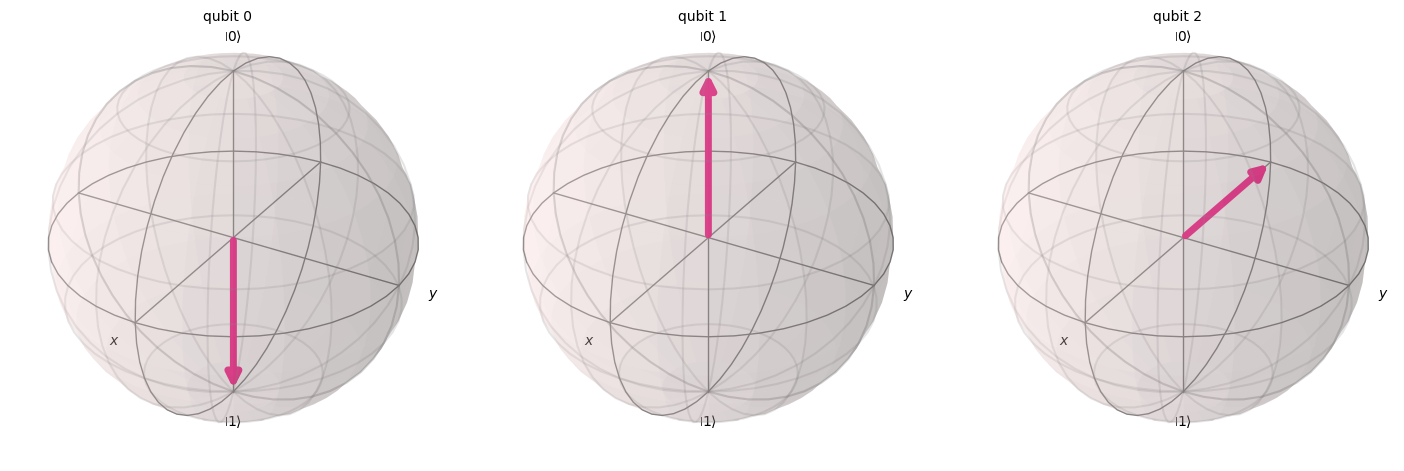

In [33]:
plot_bloch_multivector(statevector)

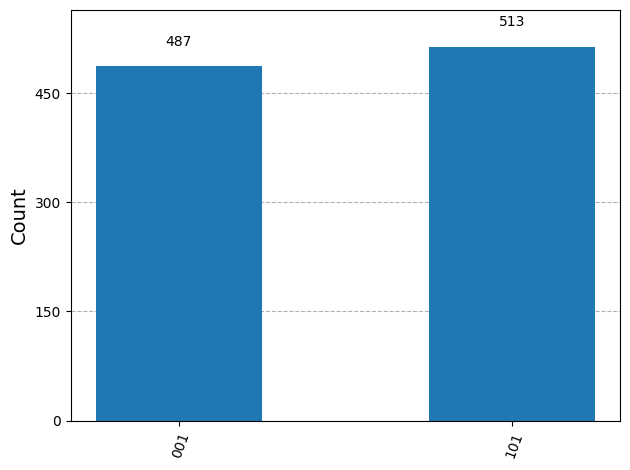

In [34]:
plot_histogram(counts)

# create entanglment with controll and h gates

In [35]:
# Create a quantum circuit with 2 qubits (no classical bits)
qc = qiskit.QuantumCircuit(2)  
# This creates a quantum circuit with 2 qubits, allowing you to perform operations on 2 qubits in parallel.
# No classical bits are included at this stage, meaning no measurements have been performed yet.

# Define the initial state vector as [1, 0, 0, 0]
# This vector represents the computational basis state |00⟩, which means both qubits are initialized to 0.
# The vector [1, 0, 0, 0] indicates that the system is in the state |00⟩ with probability 1 (since only the first element is 1, and the others are 0).
initial_state = [1, 0, 0, 0]  

# Normalize the state vector to ensure its total probability is 1.
# The norm of a vector is the square root of the sum of the squared magnitudes of all its components.
# In this case, the vector has only one non-zero component (at position 0), so its norm is 1.
norm = np.linalg.norm(initial_state)  
# The norm is sqrt(1^2 + 0^2 + 0^2 + 0^2) = sqrt(1) = 1, so the vector is already normalized.

# Initialize the quantum circuit with the specified initial state.
qc.initialize(initial_state)  
# The `initialize` operation sets the qubits in the quantum circuit to the provided initial state vector.
# In this case, the state vector corresponds to the state |00⟩ (both qubits initialized to 0).


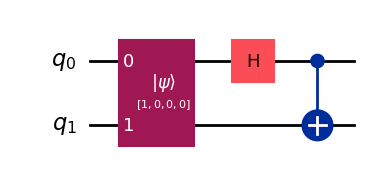

In [36]:
# Apply a Hadamard gate (H) on qubit 0
qc.h(0)  
# The Hadamard gate (H) is a single-qubit gate that creates an equal superposition of the |0⟩ and |1⟩ states.
# Applying it to qubit 0 will transform it from |0⟩ to the state (|0⟩ + |1⟩)/√2, which is an equal superposition of |0⟩ and |1⟩.

# Apply a CNOT gate (CX) with qubit 0 as the control and qubit 1 as the target
qc.cx(0, 1)  
# The CNOT (Controlled-NOT) gate is a two-qubit operation that flips the target qubit (qubit 1) if the control qubit (qubit 0) is in state |1⟩.
# If qubit 0 is in state |0⟩, qubit 1 is unchanged. If qubit 0 is in state |1⟩, qubit 1 is flipped (i.e., performs an X operation on qubit 1).

# Visualize the quantum circuit using Matplotlib
qc.draw('mpl')  
# The `draw('mpl')` command generates a graphical representation of the quantum circuit using Matplotlib.
# The visualization will show the two qubits, the Hadamard gate (H) on qubit 0, and the CNOT gate (CX) between qubit 0 and qubit 1.


In [37]:
backend=Aer.get_backend("statevector_simulator")
#qc.measure_all()
#measurment can destroy the entanglment
job=backend.run(qc)
result=job.result()
counts=result.get_counts()
statevector=result.get_statevector()
print(counts)
print(statevector)
array_to_latex(statevector,pretext='\\text{statevector} = ')

{np.str_('00'): np.float64(0.5), np.str_('11'): np.float64(0.5)}
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


<IPython.core.display.Math object>

In [38]:
simulator = AerSimulator()
compiled_circuit =qiskit.transpile(qc, simulator)
compiled_circuit.measure_all()
sim_result = simulator.run(compiled_circuit,shots=1000).result()
counts = sim_result.get_counts()
print(counts)

{'00': 485, '11': 515}


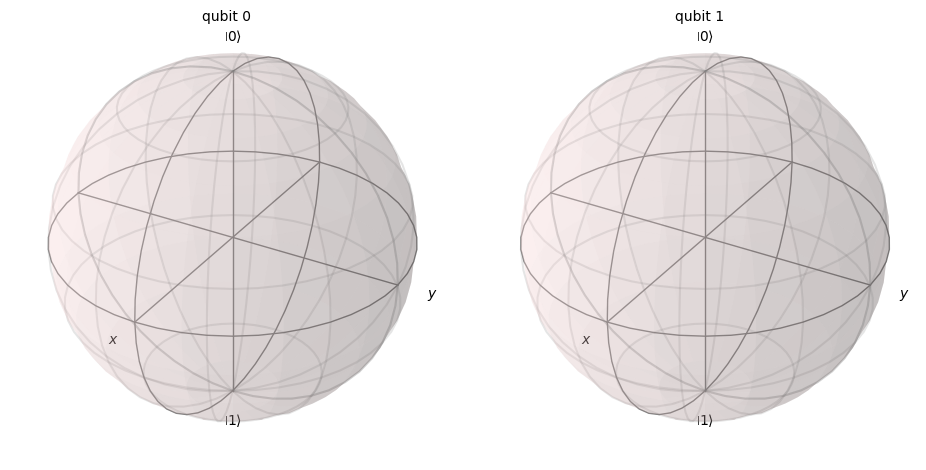

In [39]:
plot_bloch_multivector(statevector)

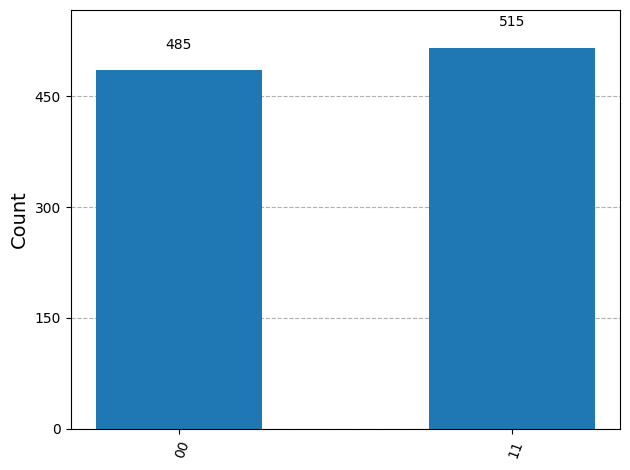

In [40]:
plot_histogram(counts)

# swap gates

In [41]:
# Create a quantum circuit with 2 qubits (no classical bits)
qc = qiskit.QuantumCircuit(2)  
# This creates a quantum circuit with 2 qubits. You are initializing these qubits to a specified state.
# No classical bits are included at this stage, meaning no measurements have been performed yet.

# Define the initial state vector as [0, 1, 0, 0]
# This vector represents the quantum state |10⟩, where qubit 0 is in state |1⟩ and qubit 1 is in state |0⟩.
# The vector [0, 1, 0, 0] indicates that the system is in the state |10⟩ with probability 1 (since only the second element is 1, and the others are 0).
initial_state = [0, 1, 0, 0]  

# Normalize the state vector to ensure its total probability is 1.
# The norm of a vector is the square root of the sum of the squared magnitudes of all its components.
# In this case, the vector has only one non-zero component (at position 1), so its norm is 1.
norm = np.linalg.norm(initial_state)  
# The norm is sqrt(0^2 + 1^2 + 0^2 + 0^2) = sqrt(1) = 1, so the vector is already normalized.

# Initialize the quantum circuit with the specified initial state.
qc.initialize(initial_state)  
# The `initialize` function sets the qubits in the quantum circuit to the provided initial state vector.
# In this case, the state vector corresponds to the state |10⟩, meaning qubit 0 is in state |1⟩ and qubit 1 is in state |0⟩.


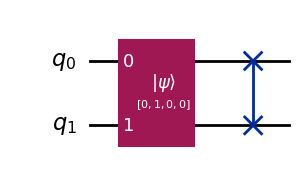

In [42]:
# Apply a SWAP gate between qubits 0 and 1
qc.swap(0, 1)  
# The SWAP gate swaps the states of two qubits. In this case, qubit 0 and qubit 1 will exchange their states.
# After this operation, if qubit 0 was in state |1⟩ and qubit 1 was in state |0⟩, 
# qubit 0 will now be in state |0⟩, and qubit 1 will be in state |1⟩.

# Visualize the quantum circuit using Matplotlib
qc.draw('mpl')  
# The `draw('mpl')` command generates a graphical representation of the quantum circuit using Matplotlib.
# The visualization will show the qubits and the SWAP gate applied between qubit 0 and qubit 1.


In [43]:
backend=Aer.get_backend("statevector_simulator")
job=backend.run(qc)
result=job.result()
counts=result.get_counts()
statevector=result.get_statevector()
print(counts)
print(statevector)
array_to_latex(statevector,pretext='\\text{statevector} = ')

{np.str_('10'): np.float64(1.0)}
Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


<IPython.core.display.Math object>

In [44]:
simulator = AerSimulator()
compiled_circuit =qiskit.transpile(qc, simulator)
compiled_circuit.measure_all()
sim_result = simulator.run(compiled_circuit,shots=1000).result()
counts = sim_result.get_counts()
print(counts)

{'01': 1000}


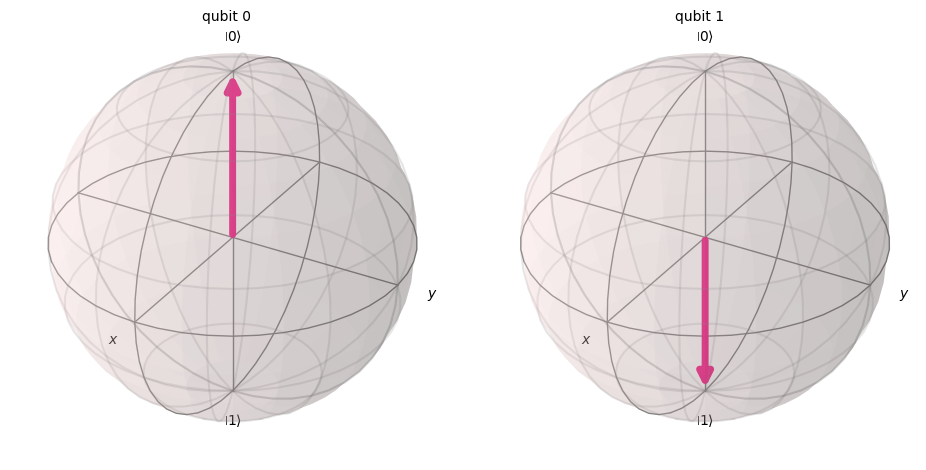

In [45]:
plot_bloch_multivector(statevector)

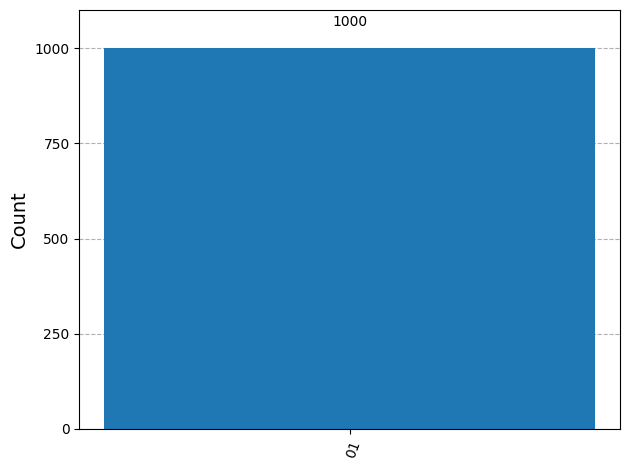

In [46]:
plot_histogram(counts)

In [47]:
# Create a quantum circuit with 2 qubits (no classical bits)
qc = qiskit.QuantumCircuit(2)  
# This initializes a quantum circuit with 2 qubits. No classical bits are defined at this stage, meaning no measurements have been performed.

# Define the initial state vector as [0, 1, 0, 0]
# This vector represents the quantum state |10⟩, where qubit 0 is in state |1⟩ and qubit 1 is in state |0⟩.
# The state vector [0, 1, 0, 0] corresponds to the state |10⟩, with qubit 0 in state |1⟩ and qubit 1 in state |0⟩.
initial_state = [0, 1, 0, 0]  

# Normalize the state vector to ensure the total probability is 1.
# The norm of a vector is the square root of the sum of the squared magnitudes of all its components.
# In this case, the vector has only one non-zero component (at position 1), so its norm is 1.
norm = np.linalg.norm(initial_state)  
# The norm is sqrt(0^2 + 1^2 + 0^2 + 0^2) = sqrt(1) = 1, so the vector is already normalized.

# Initialize the quantum circuit with the specified initial state.
qc.initialize(initial_state)  
# The `initialize` method sets the qubits in the quantum circuit to the provided initial state vector.
# In this case, the state vector corresponds to the state |10⟩, meaning qubit 0 is in state |1⟩ and qubit 1 is in state |0⟩.


In [48]:
# Create a quantum circuit with 2 qubits
qc = qiskit.QuantumCircuit(2)  
# This creates a quantum circuit with 2 qubits. At this point, no gates have been applied to the qubits.

# Define the initial state vector as [0, 1, 0, 0]
# This represents the state |10⟩, where qubit 0 is in state |1⟩ and qubit 1 is in state |0⟩.
# The vector [0, 1, 0, 0] means that the quantum system is in the state |10⟩ with probability 1 (since only the second element is 1, and others are 0).
initial_state = [0, 1, 0, 0]  

# Normalize the state vector to ensure the total probability is 1.
# The norm of a vector is the square root of the sum of the squared magnitudes of all its components.
# Since the vector has only one non-zero component (at position 1), its norm is already 1.
norm = np.linalg.norm(initial_state)  
# The norm is sqrt(0^2 + 1^2 + 0^2 + 0^2) = sqrt(1) = 1, so the vector is already normalized.

# Initialize the quantum circuit with the specified initial state.
qc.initialize(initial_state)  
# The `initialize` method sets the qubits in the quantum circuit to the specified initial state vector.
# In this case, the state vector corresponds to |10⟩, meaning qubit 0 is in state |1⟩ and qubit 1 is in state |0⟩.

# Apply a CNOT gate (CX) with qubit 0 as the control and qubit 1 as the target.
qc.cx(0, 1)  
# The CNOT (Controlled-NOT) gate flips the target qubit (qubit 1) if the control qubit (qubit 0) is in state |1⟩.
# Since qubit 0 is in state |1⟩, qubit 1 will be flipped to |1⟩ after this operation. 
# The quantum state after this operation will be |11⟩.

# Apply another CNOT gate (CX) with qubit 1 as the control and qubit 0 as the target.
qc.cx(1, 0)  
# The second CNOT gate flips qubit 0 if qubit 1 is in state |1⟩.
# After the first CNOT gate, qubit 1 is in


In [49]:
backend=Aer.get_backend("statevector_simulator")
job=backend.run(qc)
result=job.result()
counts=result.get_counts()
statevector=result.get_statevector()
print(counts)
print(statevector)
array_to_latex(statevector,pretext='\\text{statevector} = ')

{np.str_('10'): np.float64(1.0)}
Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


<IPython.core.display.Math object>

In [50]:
simulator = AerSimulator()
compiled_circuit =qiskit.transpile(qc, simulator)
compiled_circuit.measure_all()
sim_result = simulator.run(compiled_circuit,shots=1000).result()
counts = sim_result.get_counts()
print(counts)

{'10': 1000}


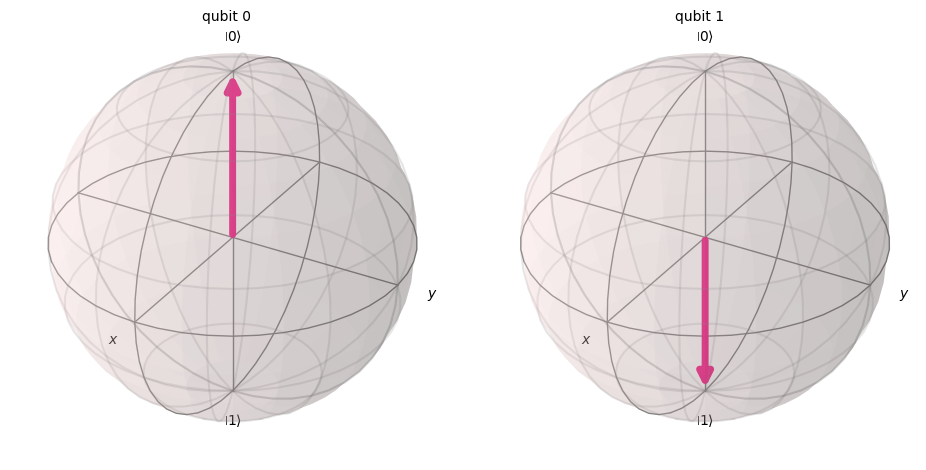

In [51]:
plot_bloch_multivector(statevector)

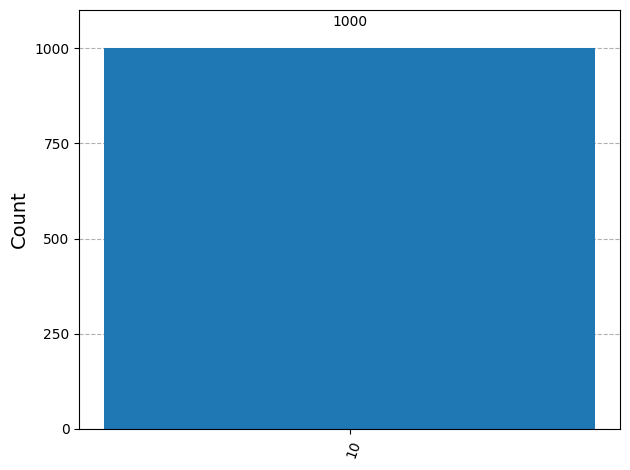

In [52]:
plot_histogram(counts)

# toffoli gates

In [53]:
# Create a quantum circuit with 3 qubits
qc = qiskit.QuantumCircuit(3)  
# This creates a quantum circuit with 3 qubits. The qubits are initialized to the state defined by the initial_state vector.

# Define the initial state vector as [0, 0, 0, 1, 0, 0, 0, 0]
# This represents the quantum state |100⟩, where:
# - Qubit 0 is in state |1⟩,
# - Qubit 1 is in state |0⟩,
# - Qubit 2 is in state |0⟩.
# The vector [0, 0, 0, 1, 0, 0, 0, 0] corresponds to the state |100⟩, where only the fourth element is non-zero.
initial_state = [0, 0, 0, 1, 0, 0, 0, 0]  

# Normalize the state vector to ensure the total probability is 1.
# The norm of a vector is the square root of the sum of the squared magnitudes of all its components.
# In this case, the vector has only one non-zero component (at position 3), so its norm is 1.
norm = np.linalg.norm(initial_state)  
# The norm is sqrt(0^2 + 0^2 + 0^2 + 1^2 + 0^2 + 0^2 + 0^2 + 0^2) = sqrt(1) = 1, so the vector is already normalized.

# Initialize the quantum circuit with the specified initial state.
qc.initialize(initial_state)  
# The `initialize` method sets the qubits in the quantum circuit to the specified initial state vector.
# In this case, the state vector corresponds to |100⟩, meaning qubit 0 is in state |1⟩, qubit 1 is in state |0⟩, and qubit 2 is in state |0⟩.


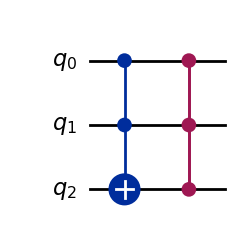

In [54]:
# Create a quantum circuit with 3 qubits
qc = qiskit.QuantumCircuit(3)  
# This creates a quantum circuit with 3 qubits. No gates have been applied yet, so the qubits are in the default state |000⟩.

# Apply a Toffoli gate (CCX), with qubits 0 and 1 as control qubits, and qubit 2 as the target.
qc.ccx(0, 1, 2)  
# The Toffoli gate (CCX) is a controlled-controlled-X gate, also known as a controlled-controlled-NOT (CCNOT).
# This gate flips the target qubit (qubit 2) if both control qubits (qubits 0 and 1) are in state |1⟩.
# If qubits 0 and 1 are both |1⟩, then qubit 2 will be flipped (|0⟩ → |1⟩ or |1⟩ → |0⟩).
# Otherwise, qubit 2 remains unchanged.

# Apply a controlled-controlled-Z gate (CCZ), with qubits 0 and 1 as control qubits, and qubit 2 as the target.
qc.ccz(0, 1, 2)  
# The CCZ gate applies a controlled-Z gate between the two control qubits (0 and 1) and the target qubit (2).
# This gate applies a Z operation (phase flip) to the target qubit if both control qubits (qubits 0 and 1) are in state |1⟩.
# If both control qubits are in state |1⟩, it adds a phase of -1 to the target qubit, changing the state of qubit 2 from |0⟩ to -|0⟩ or |1⟩ to -|1⟩.

# Visualize the quantum circuit using Matplotlib
qc.draw('mpl')  
# The `draw('mpl')` function generates a graphical representation of the quantum circuit.
# It will show 3 qubits with the Toffoli (CCX) gate and the controlled-Z (CCZ) gate applied between them.


In [55]:
backend=Aer.get_backend("statevector_simulator")
job=backend.run(qc)
result=job.result()
counts=result.get_counts()
statevector=result.get_statevector()
print(counts)
print(statevector)
array_to_latex(statevector,pretext='\\text{statevector} = ')

{np.str_('000'): np.float64(1.0)}
Statevector([ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
             -0.+0.j],
            dims=(2, 2, 2))


<IPython.core.display.Math object>

In [56]:
simulator = AerSimulator()
compiled_circuit =qiskit.transpile(qc, simulator)
compiled_circuit.measure_all()
sim_result = simulator.run(compiled_circuit,shots=1000).result()
counts = sim_result.get_counts()
print(counts)

{'000': 1000}


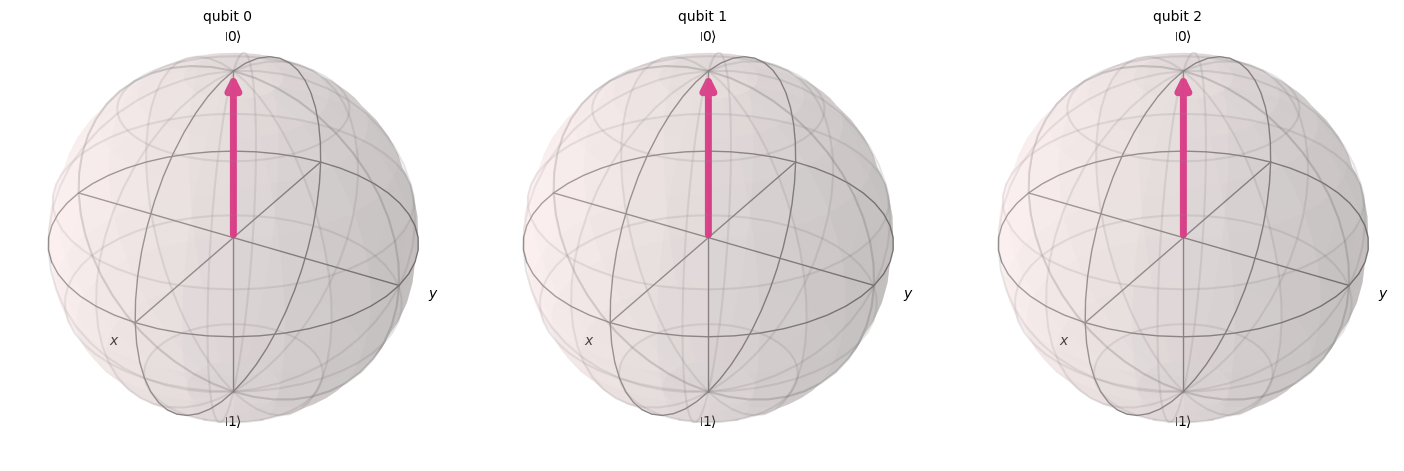

In [57]:
plot_bloch_multivector(statevector)

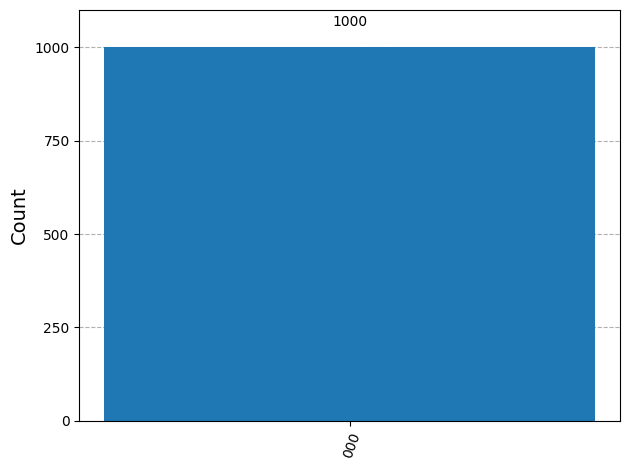

In [58]:
plot_histogram(counts)

In [59]:
qc=qiskit.QuantumCircuit(3)
initial_state = [0,0,0,1,0,0,0,0]
norm=np.linalg.norm(initial_state)
initial_state=initial_state/norm
qc.initialize(initial_state)  

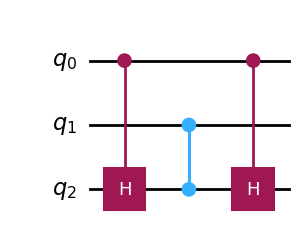

In [60]:
# Create a quantum circuit with 3 qubits
qc = qiskit.QuantumCircuit(3)  
# This creates a quantum circuit with 3 qubits. The qubits are initialized to the state |000⟩, as no gates have been applied yet.

# Apply a controlled-Hadamard (CH) gate with qubit 0 as the control and qubit 2 as the target.
qc.ch(0, 2)  
# The controlled-Hadamard (CH) gate applies a Hadamard transformation (H gate) on qubit 2 if qubit 0 is in state |1⟩.
# - If qubit 0 is in state |1⟩, the Hadamard gate is applied to qubit 2, which transforms it from |0⟩ to (|0⟩ + |1⟩)/√2 or vice versa.
# - If qubit 0 is in state |0⟩, no transformation is applied to qubit 2, and it remains in its current state.

# Apply a controlled-Z (CZ) gate with qubit 1 as the control and qubit 2 as the target.
qc.cz(1, 2)  
# The controlled-Z (CZ) gate applies a Z operation (phase flip) on qubit 2 if qubit 1 is in state |1⟩.
# - If qubit 1 is in state |1⟩, the state of qubit 2 is flipped (|0⟩ becomes -|0⟩, and |1⟩ becomes -|1⟩).
# - If qubit 1 is in state |0⟩, qubit 2 is not affected by the Z operation and remains unchanged.

# Apply another controlled-Hadamard (CH) gate with qubit 0 as the control and qubit 2 as the target.
qc.ch(0, 2)  
# The controlled-Hadamard (CH) gate is applied again in the same way as before. 
# If qubit 0 is in state |1⟩, the Hadamard transformation is applied to qubit 2, and if qubit 0 is in state |0⟩, qubit 2 remains unchanged.

# Visualize the quantum circuit using Matplotlib
qc.draw('mpl')  
# The `draw('mpl')` function generates a graphical representation of the quantum circuit.
# It will show 3 qubits, with a controlled-Hadamard (CH) gate applied twice and a controlled-Z (CZ) gate applied between qubits 1 and 2.


In [61]:
simulator = AerSimulator()
compiled_circuit =qiskit.transpile(qc, simulator)
compiled_circuit.measure_all()
sim_result = simulator.run(compiled_circuit,shots=1000).result()
counts = sim_result.get_counts()
print(counts)

{'000': 1000}


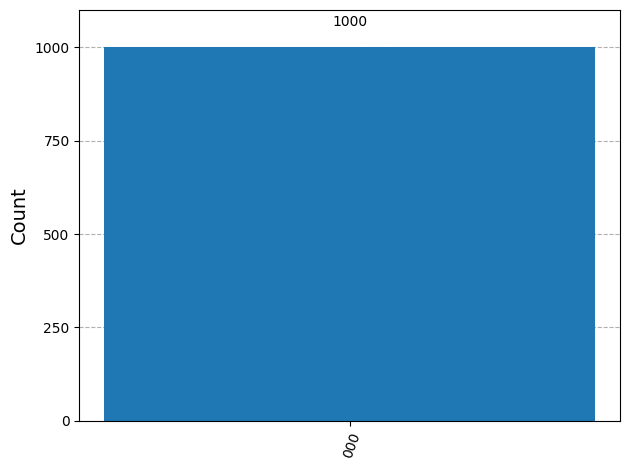

In [62]:
plot_histogram(counts)